<a href="https://colab.research.google.com/github/KayalvizhiT513/Google-PageRank-Algorithm/blob/main/Google_PageRank_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🤔 You know how searching happens before Google...💭<br>
🤓 Ordering pages based on the page with the highest frequency of the searched word.

##PageRank Algorithm


In [ ]:
import numpy as np

In [ ]:
def percentage_difference(value1, value2):
    return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100

In [ ]:
def steady_state_vector(vector, A):
    n = 100
    count = 0
    for i in range(n):
        pvector = np.round(np.dot(A, vector), 8)
        if percentage_difference(pvector, vector).all() < 0.1e-2:
            count += 1
        else:
            count = 0
        if count == 10:
            print("Number of iteration:",i)
            break
        vector = pvector
    print("Steady state vector")
    print(vector)

In [ ]:
A = np.array([[0, 0, 1, 1/2],
              [1/3, 0, 0, 0],
              [1/3, 1/2, 0, 1/2],
              [1/3, 1/2, 0, 0]])

In [ ]:
steady_state_vector(np.array([1,0,0,0]), A)

Number of iteration: 38
Steady state vector
[0.38709676 0.12903225 0.29032257 0.19354838]


In [ ]:
steady_state_vector(np.array([0,1,0,0]), A)

Number of iteration: 40
Steady state vector
[0.38709675 0.12903225 0.29032256 0.19354837]


<ipython-input-17-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in divide
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


In [ ]:
steady_state_vector(np.array([0,0,1,0]), A)

Number of iteration: 39
Steady state vector
[0.38709676 0.12903225 0.29032257 0.19354838]


<ipython-input-17-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in divide
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


In [ ]:
steady_state_vector(np.array([0,0,0,1]), A)

Number of iteration: 39
Steady state vector
[0.38709678 0.12903226 0.29032258 0.19354839]


<ipython-input-17-d4fdf7de7d20>:2: RuntimeWarning: invalid value encountered in divide
  return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100


##Google PageRank Algorithm

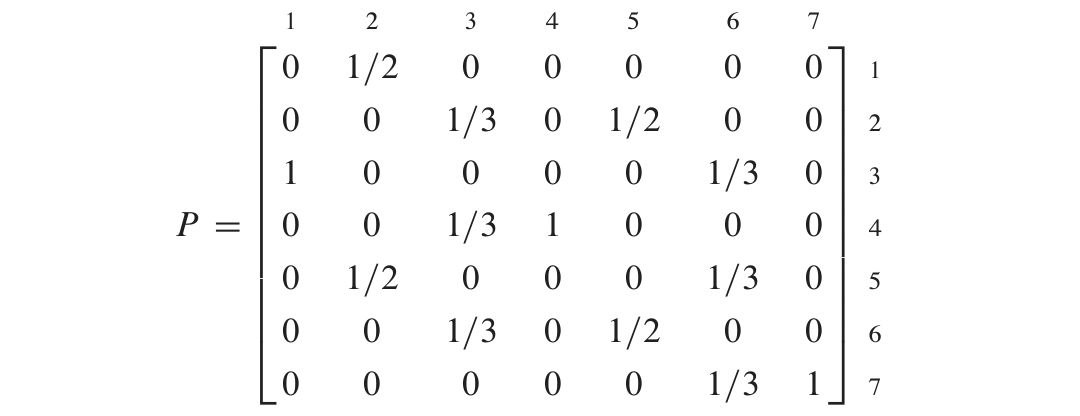

We have no outlinks from page 4 & 7. If we
 accidentally land on these pages, the probabilities of moving to other pages drops to zero


💡Google's page rank algorithm assumes that you can access any page on the web from here with equal probability. In that case probability of outlinks become 1/7 from page 4 to each of the other pages and similarly for page 7

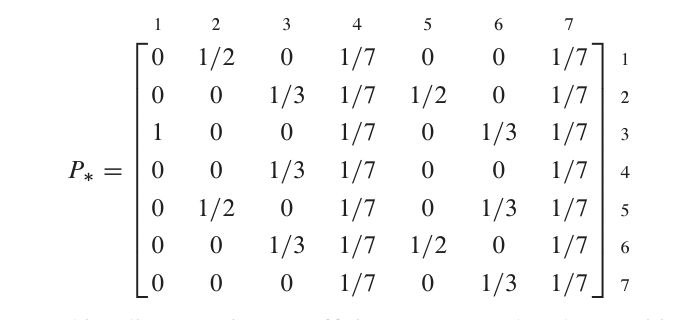

In [ ]:
A = np.array([[0, 1/2, 0, 1/7, 0, 0, 1/7],
              [0, 0, 1/3, 1/7, 1/2, 0, 1/7],
              [1, 0, 0, 1/7, 0, 1/3, 1/7],
              [0, 0, 1/3, 1/7, 0, 0, 1/7],
              [0, 1/2, 0, 1/7, 0, 1/3, 1/7],
              [0, 0, 1/3, 1/7, 1/2, 0, 1/7],
              [0, 0, 0, 1/7, 0, 1/3, 1/7]])

p = 0.9
#The Google matrix
H = (1/7)*np.ones((7,7))
M = (1 - p)*H + p*A
print("Stochastic Matrix:\n",M)
vector = np.array([1, 0, 0, 0, 0, 0, 0])
n = 100
for i in range(n):
    pvector = np.round(np.dot(M, vector), 8)
    if (pvector == vector).all():
        print(i)
        break
    vector = pvector
print("\nSteady state vector")
print(vector)

Stochastic Matrix:
 [[0.01428571 0.46428571 0.01428571 0.14285714 0.01428571 0.01428571
  0.14285714]
 [0.01428571 0.01428571 0.31428571 0.14285714 0.46428571 0.01428571
  0.14285714]
 [0.91428571 0.01428571 0.01428571 0.14285714 0.01428571 0.31428571
  0.14285714]
 [0.01428571 0.01428571 0.31428571 0.14285714 0.01428571 0.01428571
  0.14285714]
 [0.01428571 0.46428571 0.01428571 0.14285714 0.01428571 0.31428571
  0.14285714]
 [0.01428571 0.01428571 0.31428571 0.14285714 0.46428571 0.01428571
  0.14285714]
 [0.01428571 0.01428571 0.01428571 0.14285714 0.01428571 0.31428571
  0.14285714]]

Steady state vector
[0.11487163 0.17061817 0.19266339 0.09589248 0.16605708 0.17061817
 0.08927891]


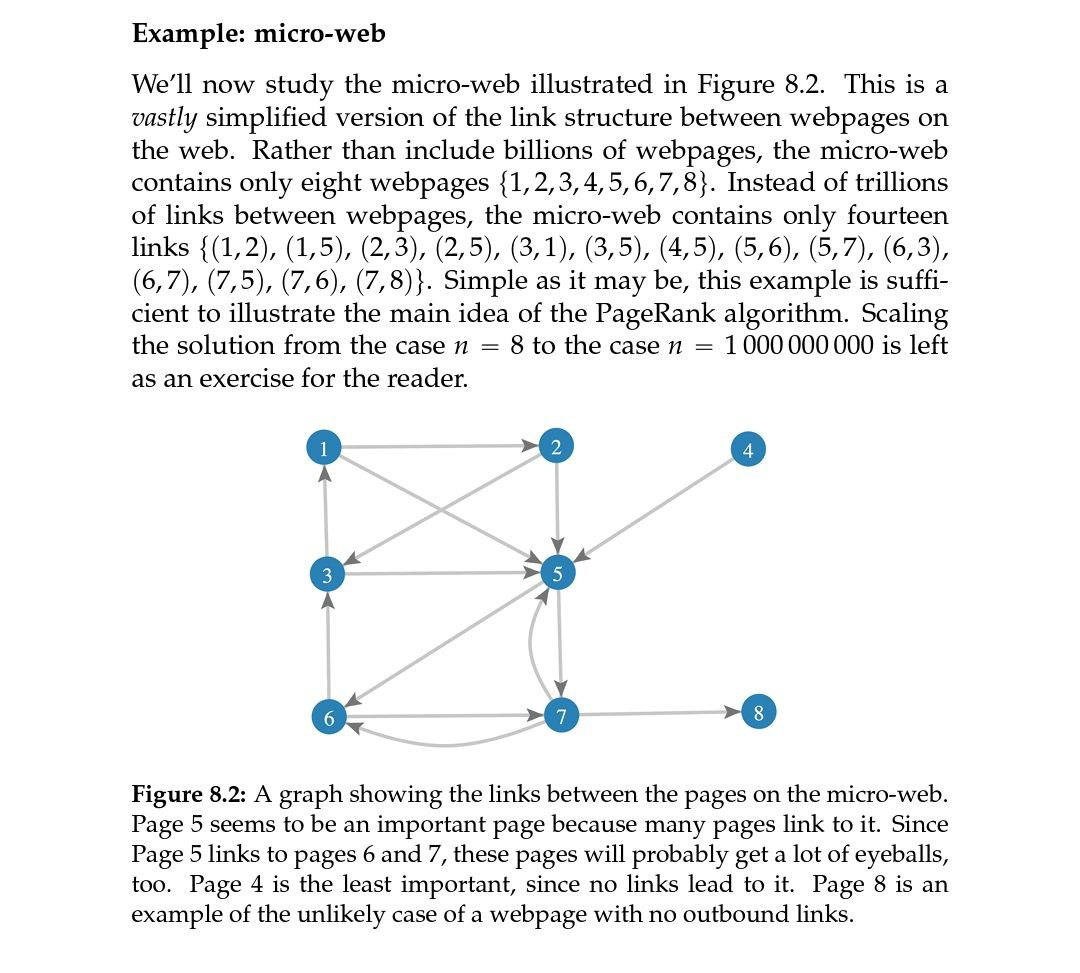

In [ ]:
#modified importance matrix
A = np.array([[0,   0,   1/2, 0, 0,   0,   0,   1/8],
              [1/2, 0,   0,   0, 0,   0,   0,   1/8],
              [0,   1/2, 0,   0, 0,   1/2, 0,   1/8],
              [0,   0,   0,   0, 0,   0,   0,   1/8],
              [1/2, 1/2, 1/2, 1, 0,   0,   1/3, 1/8],
              [0,   0,   0,   0, 1/2, 0,   1/3, 1/8],
              [0,   0,   0,   0, 1/2, 1/2, 0,   1/8],
              [0,   0,   0,   0, 0,   0,   1/3, 1/8]])
p = 0.1
#The Google matrix
B = (1/8)*np.array([[1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1]])
M = (1 - p)*A + p*B
print(M)
vector = np.array([1, 0, 0, 0, 0, 0, 0, 0])
n = 100
for i in range(n):
    pvector = np.round(np.dot(M, vector), 4)
    if (pvector == vector).all():
        print(i)
        break
    vector = pvector
print("\nSteady state vector")
print(vector)

[[0.0125 0.0125 0.4625 0.0125 0.0125 0.0125 0.0125 0.125 ]
 [0.4625 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.125 ]
 [0.0125 0.4625 0.0125 0.0125 0.0125 0.4625 0.0125 0.125 ]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.125 ]
 [0.4625 0.4625 0.4625 0.9125 0.0125 0.0125 0.3125 0.125 ]
 [0.0125 0.0125 0.0125 0.0125 0.4625 0.0125 0.3125 0.125 ]
 [0.0125 0.0125 0.0125 0.0125 0.4625 0.4625 0.0125 0.125 ]
 [0.0125 0.0125 0.0125 0.0125 0.0125 0.0125 0.3125 0.125 ]]
13

Steady state vector
[0.0815 0.0587 0.1323 0.022  0.2268 0.1864 0.2079 0.0844]
